In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import h5py
import PIL

In [2]:
#from data.convert_distance_to_depth import * 
import sys  
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/../")

#sys.path.insert(0, '../../data/')

from loaddata import *

In [3]:
#test_dataframe = pd.read_csv("../../data/downloads/image_file_test.csv")
dataframe = pd.read_csv("../../data/downloads/image_files.csv")
number_of_samples = dataframe.shape[0];
print(number_of_samples)

459


In [4]:
############################ careful ####################### 
import csv 
test_file_name = open(os.path.join("../../data/downloads/", "image_file_visualize.csv"), "w", newline="")
writer = csv.writer(test_file_name)

writer.writerow(["Depth", "Segmentation", "ToneMapped"])
 
for i in range(0, number_of_samples, 100):
    #print(dataframe.iloc[i])
    writer.writerow(dataframe.iloc[i].to_list())

In [11]:
csv_file_name = "../../data/downloads/image_files.csv"

In [12]:
test_dataframe = pd.read_csv(csv_file_name)
number_of_samples = test_dataframe.shape[0];
print(number_of_samples)

459


In [ ]:
test_depth_image_name = test_dataframe["Depth"][0]
test_depth_image = h5py.File(test_depth_image_name, "r", )["dataset"][()]

print(test_depth_image.max(axis=(0,1)))
print(test_depth_image.min(axis=(0,1)))

#test_color_image_name = test_dataframe["RGB"][0]
#test_color_image = h5py.File(test_color_image_name, "r")["dataset"][()] 

test_toned_color_image_name = test_dataframe["ToneMapped"][0]
test_toned_color_image = Image.open(test_toned_color_image_name, "r")

test_segmentation_image_name = test_dataframe["Segmentation"][0]
test_segmentation = h5py.File(test_segmentation_image_name, "r",)["dataset"][()]

print(test_segmentation.min())
print(test_segmentation.max())

3.904
1.746
-1
40


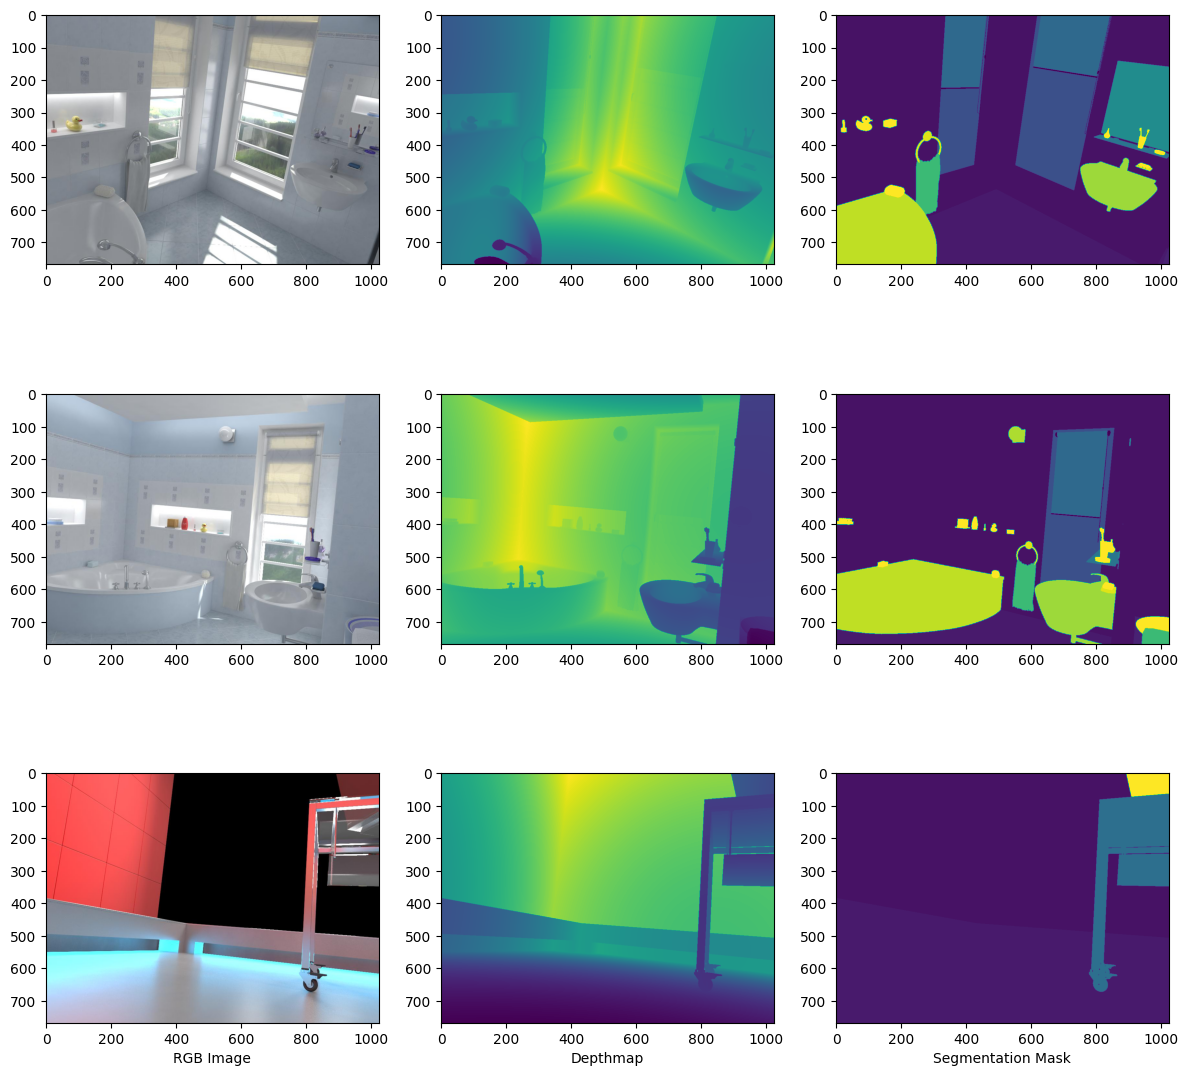

In [ ]:
def get_image(dataframe, index):
    image_triplets = []
    for keyword in ["ToneMapped", "Depth", "Segmentation"]:
        image_name = dataframe[keyword][index]
        if ".hdf5" in image_name:
            image = h5py.File(image_name, "r", )["dataset"][()]
            image_triplets.append(image)
        else: 
            image = Image.open(image_name, "r") 
            image_triplets.append(image) 
    return image_triplets 
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for index in range(0,axs.shape[0]):
    image_triplets = get_image(test_dataframe, index)
    axs[index,0].imshow(image_triplets[0])
    axs[index, 0].set_aspect("equal")
    axs[index,1].imshow(image_triplets[1])
    axs[index, 1].set_aspect("equal")
    axs[index,2].imshow(image_triplets[2])
    axs[index, 2].set_aspect("equal")


    
axs[-1,0].set_xlabel("RGB Image")
axs[-1,1].set_xlabel("Depthmap")
axs[-1,2].set_xlabel("Segmentation Mask")
fig.tight_layout()
#fig.subplots_adjust(wspace=0.2, hspace=0)
"""
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
"""
plt.show()
fig.savefig("hypersim.png", bbox_inches='tight')

In [ ]:
def display_image(data, remapping=None):
    np_data = np.array(data)
    if remapping != None: 
        np_data = remapping(np_data)
    fig, (ax) = plt.subplots(1)
    pcm = ax.imshow(np_data)
    fig.colorbar(pcm, ax=ax)    
    plt.show()
    

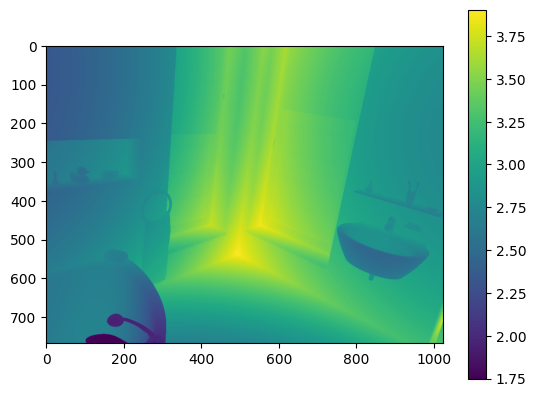

In [ ]:
### distance to camera center
display_image(test_depth_image)

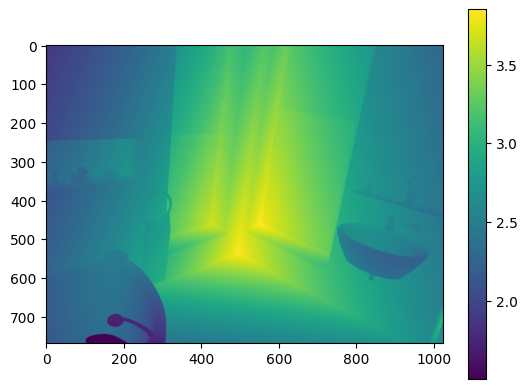

In [ ]:
#### planar depth values
from data.convert_distance_to_depth import * 
    
display_image(test_depth_image, convert_distance_to_depth)

In [ ]:
def remap_data(np_array,wanted_max=255):
    return (np_array/np_array.max(axis=(0,1))*wanted_max).astype(np.uint8)

(768, 1024, 3)
(240, 320, 3)


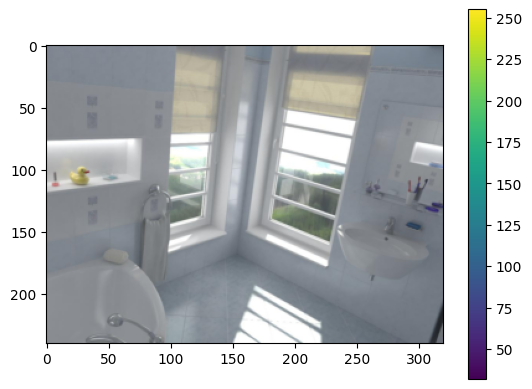

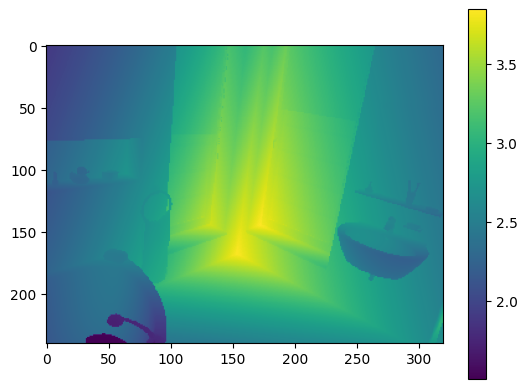

In [ ]:
### check data transformation ####### 
test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240)]))

test_sample = test_dataset.__getitem__(0); 

print(np.array(test_toned_color_image).shape)
print(np.array(test_sample["image"]).shape)

display_image(test_sample["image"])

display_image(test_sample["depth"])


(768, 1024, 3)
(228, 304, 3)


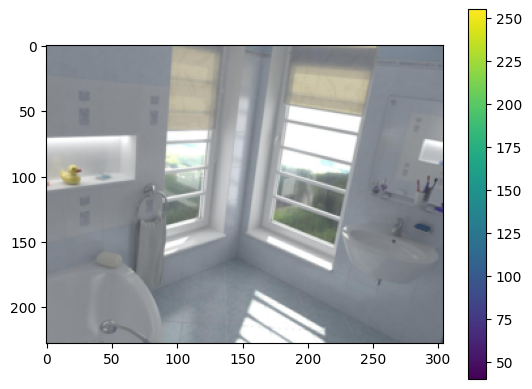

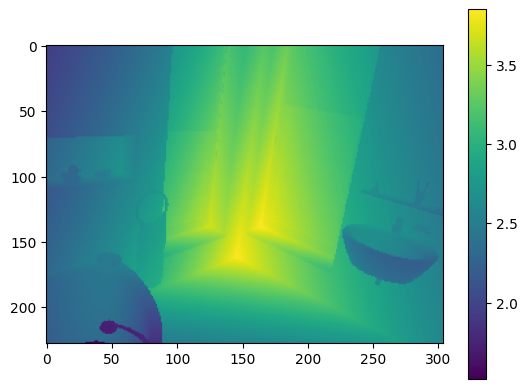

In [ ]:
### check data transformation ####### 
test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228])]))

test_sample = test_dataset.__getitem__(0); 

print(np.array(test_toned_color_image).shape)
print(np.array(test_sample["image"]).shape)

display_image(test_sample["image"])

display_image(test_sample["depth"])


In [7]:
def display_tensor_data(tensor, remap=None):
    if remap != None:
        tensor = remap(tensor)
    fig, (ax) = plt.subplots(1)
    pcm = ax.imshow(tensor.permute(1,2,0))
    fig.colorbar(pcm, ax=ax) #ticks=[-1, 0, 1]) 
    plt.show()

torch.Size([3, 228, 304])


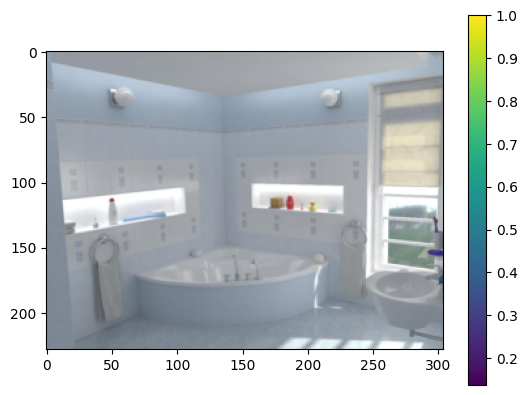

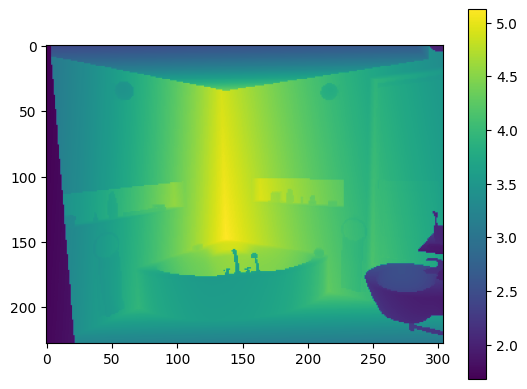

In [14]:
#### check data transformation ####### 

mean, std = get_dataset_stats(csv_filename=csv_file_name)

test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228]), ToTensor(is_test=True)]))

test_sample = test_dataset.__getitem__(45); 

print(test_sample["image"].shape)

display_tensor_data(test_sample["image"])

display_tensor_data(test_sample["depth"])

In [34]:
import loaddata
# train_loader = loaddata.getTrainingData(2)
train_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=None)

train_loader = DataLoader(train_dataset, 2,
                                     shuffle=False, num_workers=4, pin_memory=False)


In [37]:
for i, sample_batched in enumerate(train_loader):
    image, depth = sample_batched['image'], sample_batched['depth']
    # display_tensor_data(image)
    if depth.isnan().any():

        display_image(depth[0,:,:])
        display_image(depth[1,:,:])
        print(depth)
        print(i)
        break
    continue

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/user/Nextcloud/Documents/ETHZ/semester4/3dVision/.3d-env/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 127, in collate
    return elem_type({key: collate([d[key] for d in batch], collate_fn_map=collate_fn_map) for key in elem})
  File "/home/user/Nextcloud/Documents/ETHZ/semester4/3dVision/.3d-env/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 127, in <dictcomp>
    return elem_type({key: collate([d[key] for d in batch], collate_fn_map=collate_fn_map) for key in elem})
  File "/home/user/Nextcloud/Documents/ETHZ/semester4/3dVision/.3d-env/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 150, in collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.JpegImagePlugin.JpegImageFile'>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/user/Nextcloud/Documents/ETHZ/semester4/3dVision/.3d-env/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/user/Nextcloud/Documents/ETHZ/semester4/3dVision/.3d-env/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/home/user/Nextcloud/Documents/ETHZ/semester4/3dVision/.3d-env/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 264, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/home/user/Nextcloud/Documents/ETHZ/semester4/3dVision/.3d-env/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 130, in collate
    return {key: collate([d[key] for d in batch], collate_fn_map=collate_fn_map) for key in elem}
  File "/home/user/Nextcloud/Documents/ETHZ/semester4/3dVision/.3d-env/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 130, in <dictcomp>
    return {key: collate([d[key] for d in batch], collate_fn_map=collate_fn_map) for key in elem}
  File "/home/user/Nextcloud/Documents/ETHZ/semester4/3dVision/.3d-env/lib/python3.10/site-packages/torch/utils/data/_utils/collate.py", line 150, in collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.JpegImagePlugin.JpegImageFile'>


In [23]:
    def normalize(tensor, mean, std):
        """Normalize a tensor image with mean and standard deviation.
        See ``Normalize`` for more details.
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
            mean (sequence): Sequence of means for R, G, B channels respecitvely.
            std (sequence): Sequence of standard deviations for R, G, B channels
                respecitvely.
        Returns:
            Tensor: Normalized image.
        """

        # TODO: make efficient
        for t, m, s in zip(tensor, mean, std):
            print(t.min())
            print(t.max())
            t.sub_(m).div_(s)
            print(t.min())
            print(t.max())
            
            
        return tensor

In [41]:
from data.get_image_stats import get_dataset_stats
mean, std = get_dataset_stats(csv_file_name)
def denormalize(image):
    for channel in range(0, image.shape[0]):
        image[channel,:,:].mul_(std[channel]).add_(mean[channel])
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(40, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.1569)
tensor(1.)
torch.float32
tensor(0.1569)
tensor(1.)
tensor(-2.3538)
tensor(1.6938)
tensor(0.1804)
tensor(1.)
tensor(-1.2619)
tensor(2.0671)
tensor(0.1843)
tensor(1.)
tensor(-1.1690)
tensor(2.0499)
torch.Size([3, 228, 304])


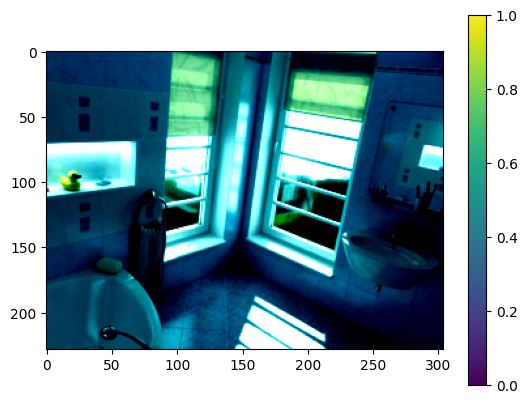

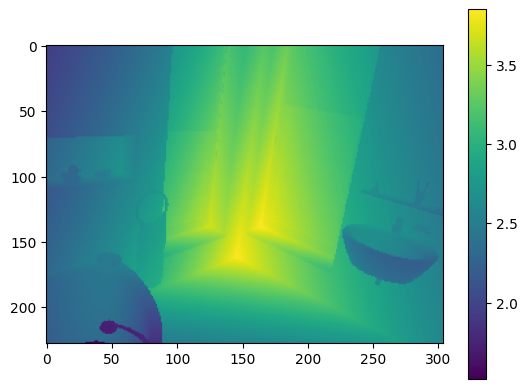

In [24]:
### check data transformation ####### 

mean, std = get_dataset_stats(csv_filename=csv_file_name)

test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228]), ToTensor(is_test=True)]))

test_sample = test_dataset.__getitem__(0)

print(test_sample["image"].dtype)

normalized_color_image = normalize(test_sample["image"], mean, std)

print(test_sample["image"].shape)

display_tensor_data(normalized_color_image)

display_tensor_data(test_sample["depth"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.64255929 0.50137264 0.49386166]
[0.22883341 0.24708676 0.25379886]


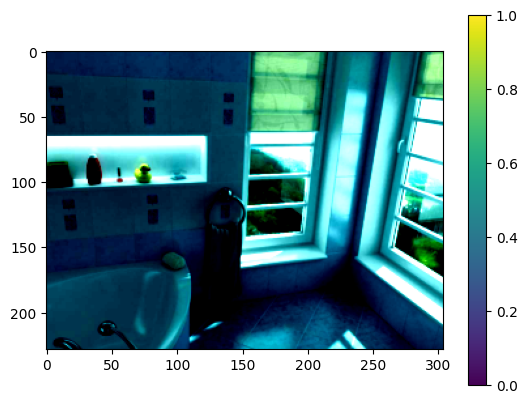

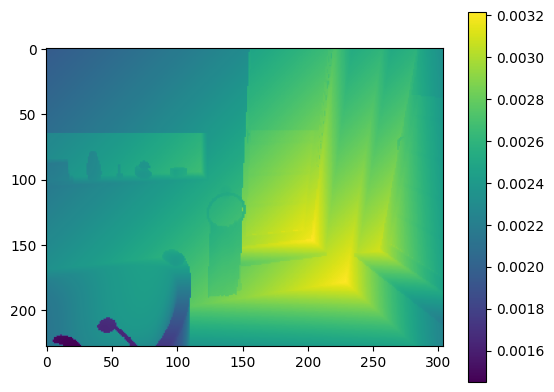

In [18]:
### check data transformation ####### 

mean, std = get_dataset_stats(csv_filename=csv_file_name)

print(mean)

print(std)

test_dataset = depthDataset(csv_file=csv_file_name,
                                       transform=transforms.Compose([
                                           Scale(240), CenterCrop([304, 228], [304, 228]), ToTensor(is_test=True), Normalize(mean, std)]))

test_sample = test_dataset.__getitem__(0)

display_tensor_data(test_sample["image"])

display_tensor_data(test_sample["depth"])

In [29]:
########## check edge detection ############# 
from test import *

torch.Size([1, 1, 228, 304])


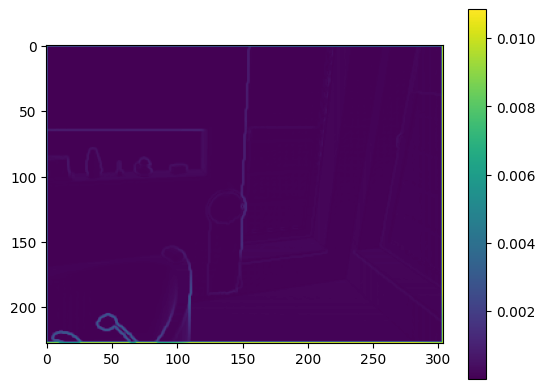

tensor(False, device='cuda:0')
tensor(False, device='cuda:0')


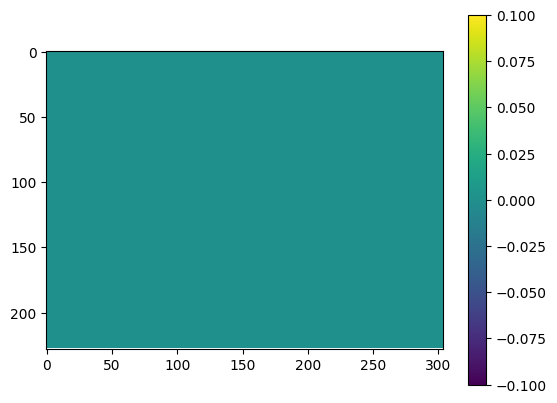

In [20]:
print(test_sample["depth"][None,:].shape) 
if(torch.cuda.is_available()):
    depth_edge = edge_detection(test_sample["depth"][None, :].cuda()) #additional dimension due to batch 
    display_tensor_data(depth_edge.cpu())
    
else:
    depth_edge = edge_detection(test_sample["depth"][None, :]) 
    display_tensor_data(depth_edge)



thre = 0.25
edge_valid = (depth_edge > thre)

print(edge_valid.min())
print(edge_valid.max())

display_tensor_data(edge_valid.cpu())

In [26]:
torch.cuda.is_available = lambda : False

In [30]:
model = define_model(is_resnet=False, is_densenet=False, is_senet=True)
if(torch.cuda.is_available()):
    model = torch.nn.DataParallel(model).cuda()
    model.load_state_dict(torch.load('./pretrained_model/model_senet', map_location=torch.device('cpu')))
else:
    model = torch.nn.DataParallel(model)
    model.load_state_dict(torch.load('./pretrained_model/model_senet', map_location=torch.device('cpu')))
    


In [31]:
def test_sample(model, test_loader): 
    model.eval()
    depth_results = []
    for i, sample_batched in enumerate(test_loader):
        torch.cuda.empty_cache()
        
        image, depth = sample_batched['image'], sample_batched['depth']
        if(torch.cuda.is_available()):
            depth = depth.cuda(non_blocking=True) #
            image = image.cuda()
        image = torch.autograd.Variable(image, requires_grad=False)
        depth = torch.autograd.Variable(depth, requires_grad=False)
        output = model(image)
        output = torch.nn.functional.interpolate(output, size=[depth.size(2),depth.size(3)], mode='bilinear')
        #display_tensor_data(output[0,:].detach())
        #display_tensor_data(depth[0,:])
        #plt.imshow(output[0,:].permute(1, 2, 0).detach().numpy())
        #plt.show()
        depth_results.append(output)
        torch.cuda.empty_cache()
        
    return depth_results
    

In [32]:
###### network output ########### 
torch.cuda.empty_cache()
test_loader = loaddata.getTestingData(1, csv_file_name)
depth_results = test_sample(model, test_loader)



[0.64717275 0.49108199 0.48054518]
[0.20830748 0.2462041  0.25340463]
tensor(40, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.1569)
tensor(1.)
tensor(-2.3538)
tensor(2.0671)


/Users/alicemazzoleni/anaconda3/envs/3dVisionProject/lib/python3.9/site-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


tensor(34, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.1333)
tensor(1.)
tensor(-2.4667)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(1, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0039)
tensor(1.)
tensor(-2.9186)
tensor(2.0671)
tensor(1, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0039)
tensor(1.)
tensor(-2.8433)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.8997)
tensor(2.0671)
tensor(3, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0118)
tensor(1.)
tensor(-2.8244)
tensor(2.0671)
tensor(13, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0510)
tensor(1.)
tensor(-2.8621)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
ten

In [105]:
torch.save(torch.concat(depth_results).unsqueeze(1), 'depth_outputs.pt')

In [106]:
depth_outputs = torch.load("depth_outputs.pt")

print(len(depth_results))

16


In [155]:
def display_image_pairs(rgb_image_tensor, segmentation):
    fig, axs = plt.subplots(2)
    axs[0].imshow(rgb_image_tensor.permute(1,2,0))
    axs[1].imshow(segmentation)
    plt.show()
    
def compute_error(ground_truth_depth, depth_output):
    error = torch.abs(ground_truth_depth - depth_output); 
    thr = 0.6;
    error[error < thr] = 0
    return error
        
def display_image_triplets(ground_truth_depth, depth_output):
    
    print("Depth max: ", depth_output.max())
    print("Depth min: ", depth_output.min())
    print("Depth groundtruth max: ", ground_truth_depth.max())
    print("Depth groundtruth min: ", ground_truth_depth.min())
    error = compute_error(ground_truth_depth, depth_output)
        
    print("Error max: ", error.max())
    print("Error min: ", error.min())
    min_scale = min(ground_truth_depth.min(), depth_output.min())
    max_scale = max(ground_truth_depth.max(), depth_output.max())
    if ground_truth_depth.isnan().any():
        temp = ground_truth_depth
        temp[temp.isnan()] = 3; 
        min_scale = min(temp.min(), depth_output.min())
        max_scale = max(temp.max(), depth_output.max())
        print("Min_Scale: ", min_scale)
        print("Max_Scale: ", max_scale)
        
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 16))
    pcm = axs[0].imshow(ground_truth_depth.permute(1,2,0), vmax = max_scale, vmin = min_scale)
    fig.colorbar(pcm, ax=axs[0],fraction=0.046, pad=0.04)
    pcm2 = axs[1].imshow(depth_output.permute(1,2,0), vmax = max_scale, vmin = min_scale)
    fig.colorbar(pcm2, ax=axs[1], fraction=0.046, pad=0.04)
    pcm3 = axs[2].imshow(error.permute(1,2,0))
    fig.colorbar(pcm3, ax=axs[2],fraction=0.046, pad=0.04)
    fig.tight_layout()
    plt.show()
    #plt.savefig("plots/")
    
def plot(ground_truth_depth, depth_output, rgb_image, plot_name):
    print("Depth max: ", depth_output.max())
    print("Depth min: ", depth_output.min())
    print("Depth groundtruth max: ", ground_truth_depth.max())
    print("Depth groundtruth min: ", ground_truth_depth.min())
    error = compute_error(ground_truth_depth, depth_output)
        
    print("Error max: ", error.max())
    print("Error min: ", error.min())
    min_scale = min(ground_truth_depth.min(), depth_output.min())
    max_scale = max(ground_truth_depth.max(), depth_output.max())
    if ground_truth_depth.isnan().any():
        temp = ground_truth_depth
        temp[temp.isnan()] = 3; 
        min_scale = min(temp.min(), depth_output.min())
        max_scale = max(temp.max(), depth_output.max())
        print("Min_Scale: ", min_scale)
        print("Max_Scale: ", max_scale)
        
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 16))
    axs[0].imshow(rgb_image.permute(1,2,0))
    axs[0].set_xlabel("Input Image")
    pcm = axs[1].imshow(ground_truth_depth.permute(1,2,0), vmax = max_scale, vmin = min_scale)
    fig.colorbar(pcm, ax=axs[1],fraction=0.046, pad=0.04)
    axs[1].set_xlabel("Ground Truth Depthmap in meters")
    pcm2 = axs[2].imshow(depth_output.permute(1,2,0), vmax = max_scale, vmin = min_scale)
    fig.colorbar(pcm2, ax=axs[2], fraction=0.046, pad=0.04)
    axs[2].set_xlabel("Model Output Depthmap in meters")
    pcm3 = axs[3].imshow(error.permute(1,2,0))
    fig.colorbar(pcm3, ax=axs[3],fraction=0.046, pad=0.04)
    axs[3].set_xlabel("L1 error thresholded at 0.6 m")
    fig.tight_layout()
    plt.show()
    fig.savefig(plot_name, bbox_inches='tight')
    
    

tensor(40, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.1569)
tensor(1.)
tensor(-2.3538)
tensor(2.0671)
0


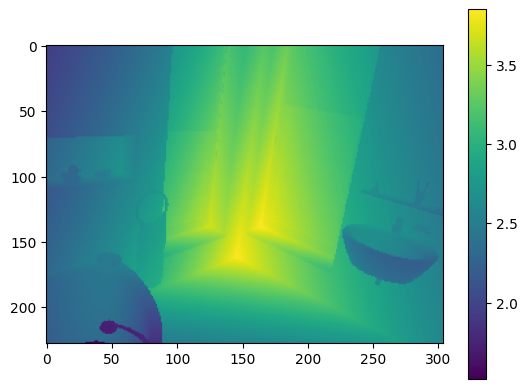

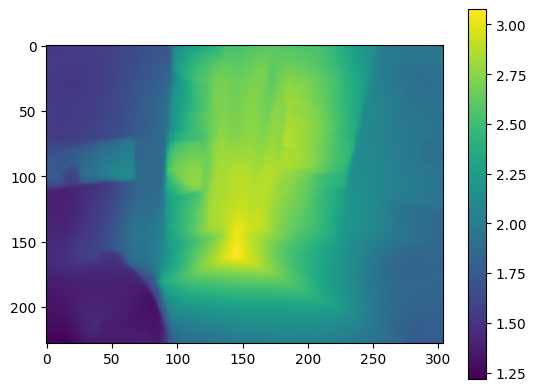

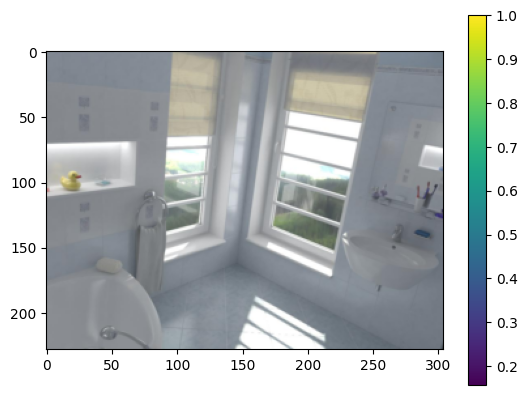

tensor(34, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.1333)
tensor(1.)
tensor(-2.4667)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(1, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0039)
tensor(1.)
tensor(-2.9186)
tensor(2.0671)
tensor(1, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0039)
tensor(1.)
tensor(-2.8433)
tensor(2.0671)
5


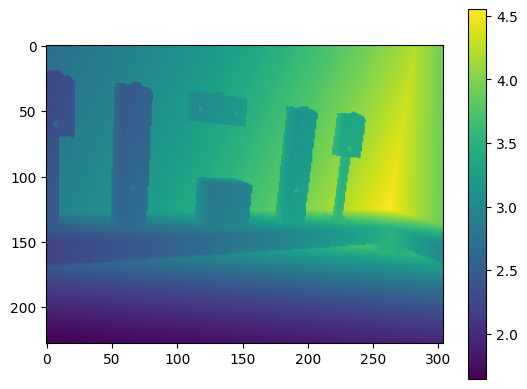

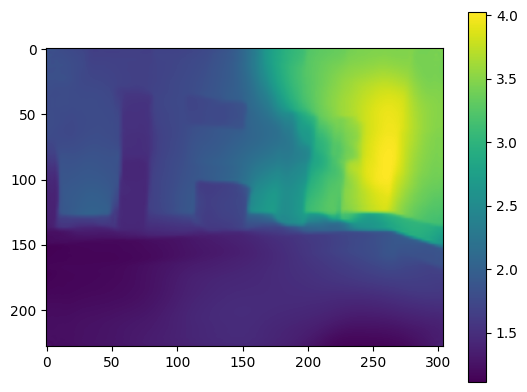

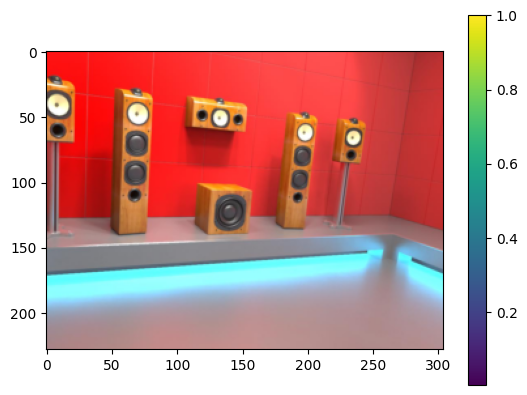

tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.8997)
tensor(2.0671)
tensor(3, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0118)
tensor(1.)
tensor(-2.8244)
tensor(2.0671)
tensor(13, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0510)
tensor(1.)
tensor(-2.8621)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
10


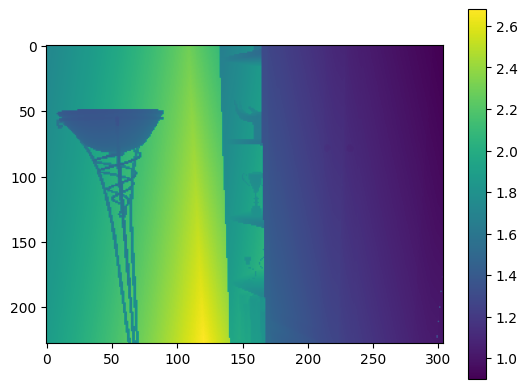

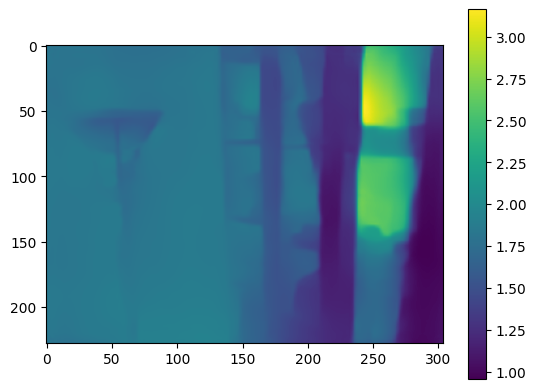

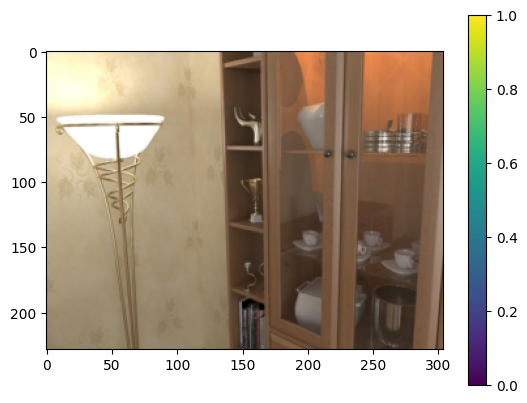

tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.6738)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-1.9946)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.8056)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.2973)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.3538)
tensor(2.0671)
15


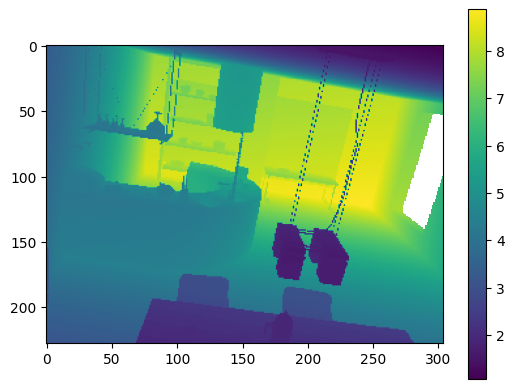

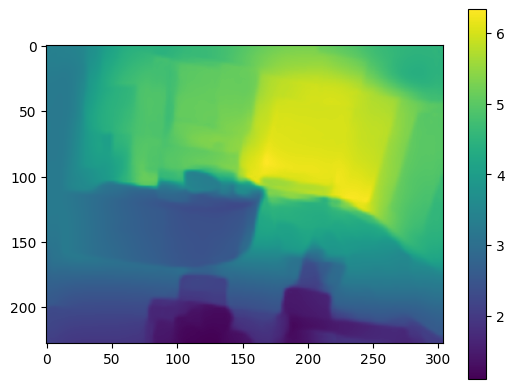

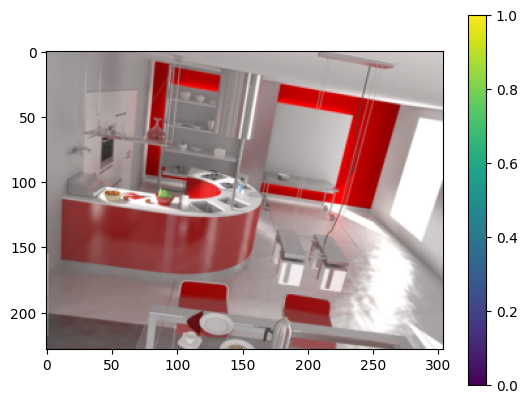

In [44]:
for i, sample_batched in enumerate(test_loader):
    if(i%5==0):
        print(i)
        display_tensor_data(sample_batched["depth"][0,:].detach())
        display_tensor_data(depth_results[i][0,:].detach())
        display_tensor_data(sample_batched["image"][0,:].detach(), denormalize)

tensor(40, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.1569)
tensor(1.)
tensor(-2.3538)
tensor(2.0671)
0
Depth max:  tensor(3.0770)
Depth min:  tensor(1.2185)
Depth groundtruth max:  tensor(3.8483)
Depth groundtruth min:  tensor(1.5194)
Error max:  tensor(1.6258)
Error min:  tensor(0.)


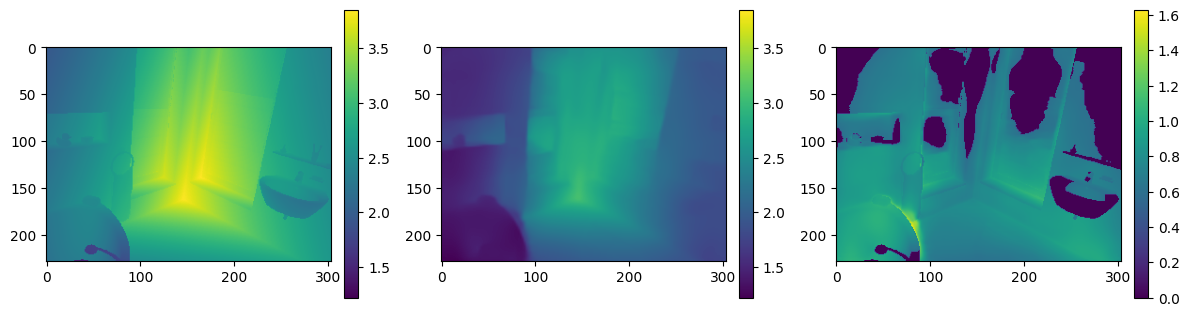

tensor(34, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.1333)
tensor(1.)
tensor(-2.4667)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(1, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0039)
tensor(1.)
tensor(-2.9186)
tensor(2.0671)
tensor(1, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0039)
tensor(1.)
tensor(-2.8433)
tensor(2.0671)
5
Depth max:  tensor(4.0240)
Depth min:  tensor(1.1123)
Depth groundtruth max:  tensor(4.5503)
Depth groundtruth min:  tensor(1.6467)
Error max:  tensor(1.8848)
Error min:  tensor(0.)


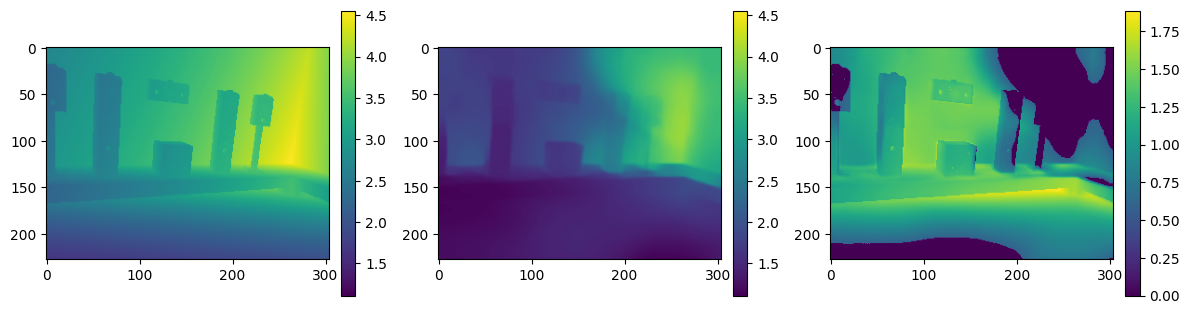

tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.8997)
tensor(2.0671)
tensor(3, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0118)
tensor(1.)
tensor(-2.8244)
tensor(2.0671)
tensor(13, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0510)
tensor(1.)
tensor(-2.8621)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
10
Depth max:  tensor(3.1642)
Depth min:  tensor(0.9565)
Depth groundtruth max:  tensor(2.6794)
Depth groundtruth min:  tensor(0.9008)
Error max:  tensor(2.0947)
Error min:  tensor(0.)


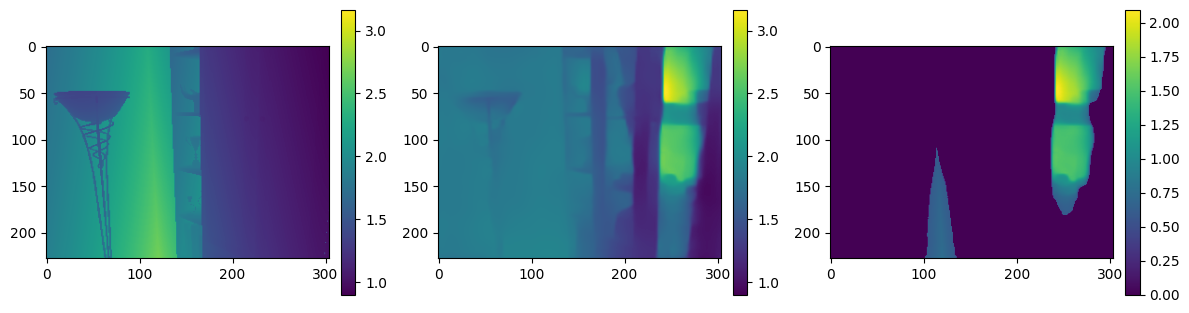

tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.6738)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-1.9946)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.8056)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.2973)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.3538)
tensor(2.0671)
15
Depth max:  tensor(6.3323)
Depth min:  tensor(1.1095)
Depth groundtruth max:  tensor(nan)
Depth groundtruth min:  tensor(nan)
Error max:  tensor(nan)
Error min:  tensor(nan)
Min_Scale:  tensor(1.0709)
Max_Scale:  tensor(8.8757)


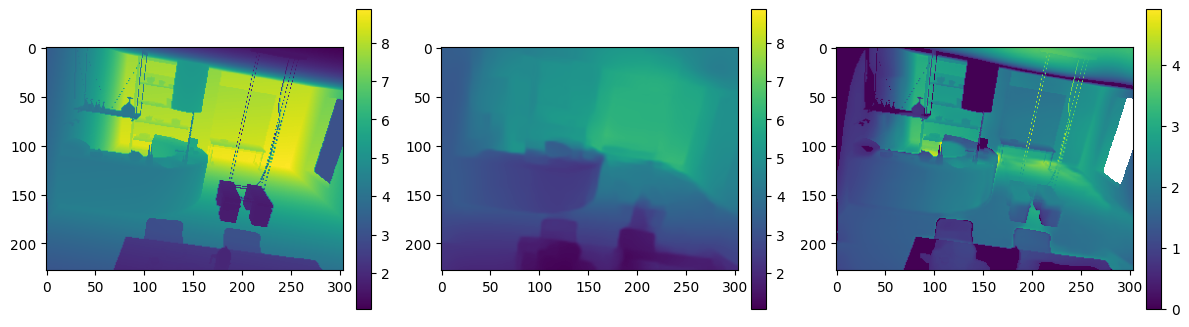

In [135]:
for i, sample_batched in enumerate(test_loader):
    if(i%5==0):
        print(i)
        display_image_triplets(sample_batched["depth"][0,:].detach(), depth_results[i][0,:].detach())

tensor(40, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.1569)
tensor(1.)
tensor(-2.3538)
tensor(2.0671)
0
Depth max:  tensor(3.0770)
Depth min:  tensor(1.2185)
Depth groundtruth max:  tensor(3.8483)
Depth groundtruth min:  tensor(1.5194)
Error max:  tensor(1.6258)
Error min:  tensor(0.)


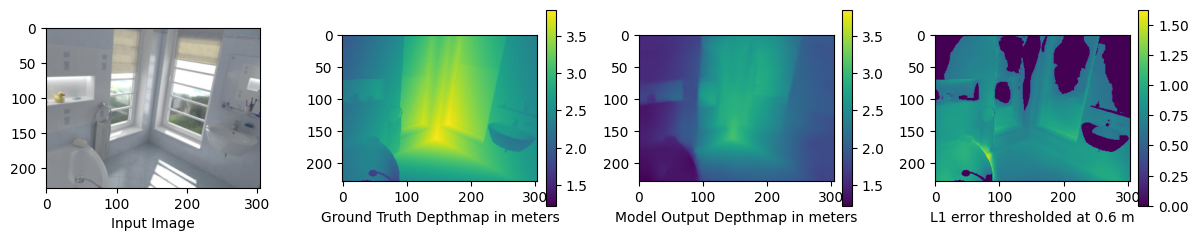

tensor(34, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.1333)
tensor(1.)
tensor(-2.4667)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(1, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0039)
tensor(1.)
tensor(-2.9186)
tensor(2.0671)
tensor(1, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0039)
tensor(1.)
tensor(-2.8433)
tensor(2.0671)
5
Depth max:  tensor(4.0240)
Depth min:  tensor(1.1123)
Depth groundtruth max:  tensor(4.5503)
Depth groundtruth min:  tensor(1.6467)
Error max:  tensor(1.8848)
Error min:  tensor(0.)


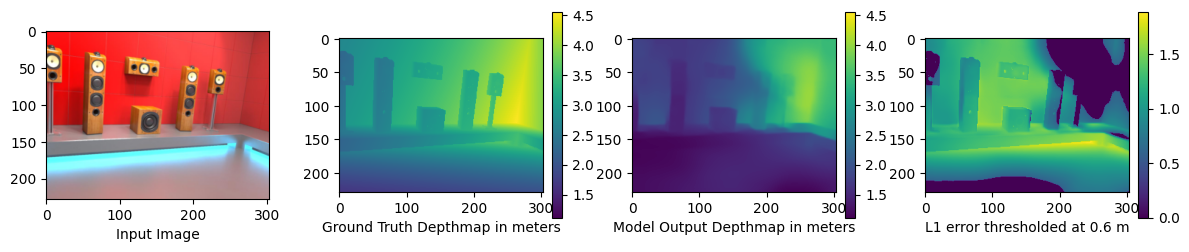

tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.8997)
tensor(2.0671)
tensor(3, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0118)
tensor(1.)
tensor(-2.8244)
tensor(2.0671)
tensor(13, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.0510)
tensor(1.)
tensor(-2.8621)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-3.1068)
tensor(2.0671)
10
Depth max:  tensor(3.1642)
Depth min:  tensor(0.9565)
Depth groundtruth max:  tensor(2.6794)
Depth groundtruth min:  tensor(0.9008)
Error max:  tensor(2.0947)
Error min:  tensor(0.)


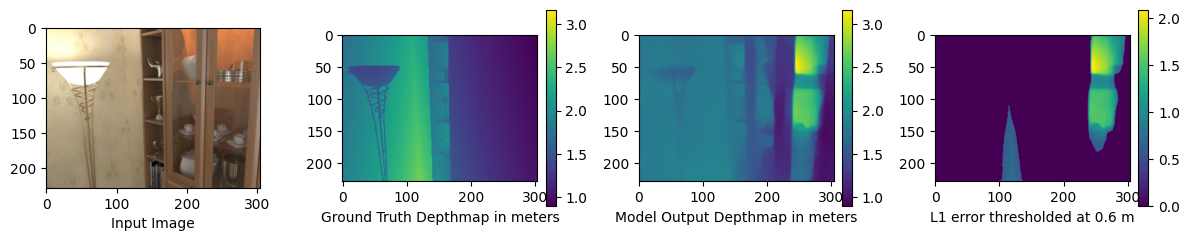

tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.6738)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-1.9946)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.8056)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.2973)
tensor(2.0671)
tensor(0, dtype=torch.uint8)
tensor(255, dtype=torch.uint8)
tensor(0.)
tensor(1.)
tensor(-2.3538)
tensor(2.0671)
15
Depth max:  tensor(6.3323)
Depth min:  tensor(1.1095)
Depth groundtruth max:  tensor(nan)
Depth groundtruth min:  tensor(nan)
Error max:  tensor(nan)
Error min:  tensor(nan)
Min_Scale:  tensor(1.0709)
Max_Scale:  tensor(8.8757)


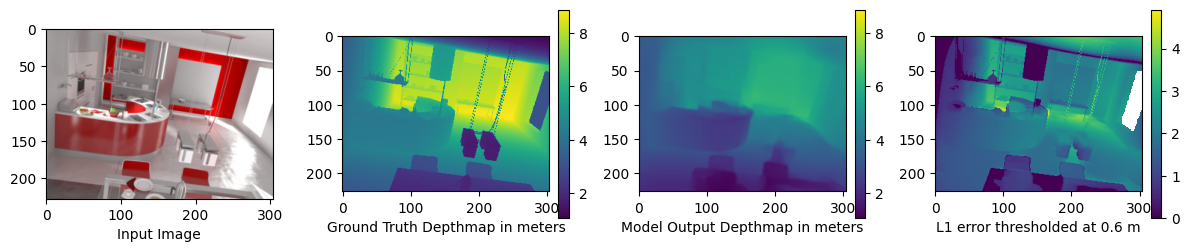

In [156]:
for i, sample_batched in enumerate(test_loader):
    if(i%5==0):
        print(i)
        plot(sample_batched["depth"][0,:].detach(), depth_results[i][0,:].detach(), denormalize(sample_batched["image"][0,:].detach()), os.path.join("pretrained_error_plots/","plot"+str(i)+".png"))

In [ ]:
depth_edge = edge_detection(depth_results[0]) #additional dimension due to batch 
display_tensor_data(depth_edge.detach())

thre = 0.25
edge_valid = (depth_edge > thre)
display_tensor_data(edge_valid)